# 신경망의 수학적 구성 요소

## 신경망과의 첫 만남(MNIST)

###  케라스에서 MNIST 데이터셋 적재하기

In [1]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

### 훈련 데이터

In [2]:
train_images.shape

(60000, 28, 28)

In [3]:
len(train_labels)

60000

In [4]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

### 테스트 데이터

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
len(test_labels)

10000

In [7]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

## 신경망 구조

In [8]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

## 컴파일 단계

In [9]:
model.compile(optimizer="rmsprop",
             loss="sparse_categorical_crossentropy",
              metrics=["accuracy"]
             )

## 이미지 데이터 준비하기

In [10]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

## 모델 훈련하기

In [11]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 0.2547 - accuracy: 0.9265
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1031 - accuracy: 0.9687
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0690 - accuracy: 0.9794
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0495 - accuracy: 0.9851
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0371 - accuracy: 0.9888


## 모델 사용하여 예측 만들기

In [12]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 [==============================] - 0s 66ms/step


array([1.2253990e-08, 2.7816634e-11, 8.6199827e-07, 5.4337333e-06,
       8.8597853e-12, 2.7185367e-08, 6.9356528e-14, 9.9999297e-01,
       6.9886184e-08, 6.7200591e-07], dtype=float32)

In [13]:
predictions[0].argmax()

7

In [14]:
predictions[0][7]

0.99999297

In [15]:
test_labels[0]

7

## 새로운 데이터에서 모델 평가하기

In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"테스트 정확도: {test_acc}")

313/313 [==============================] - 0s 1ms/step - loss: 0.0640 - accuracy: 0.9820
테스트 정확도: 0.9819999933242798


## 신경망을 위한 데이터 표현

### 스칼라(랭크-0 텐서)

In [17]:
import numpy as np
x = np.array(12)
x

array(12)

In [18]:
x.ndim

0

## 벡터(랭크-1 텐서)

In [19]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [20]:
x.ndim

1

## 행렬(랭크-2 텐서)

In [21]:
x = np.array([[5, 78, 2, 34, 0],
             [6, 79, 3, 35, 1],
             [7, 80, 4, 36, 2]])
x.ndim

2

## 랭크-3 텐서와 더 높은 랭크의 텐서

In [22]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])

x.ndim

3

## 핵심 속성

In [23]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [24]:
train_images.ndim

3

In [25]:
train_images.shape

(60000, 28, 28)

In [26]:
train_images.dtype

dtype('uint8')

### 다섯 번째 이미지 출력하기

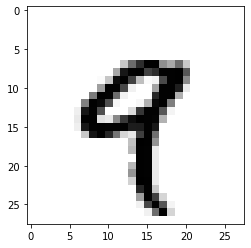

In [27]:
import matplotlib.pyplot as plt

digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [28]:
train_labels[4]

9

## 넘파이로 텐서 조작하기

In [29]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [30]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [31]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [32]:
my_slice = train_images[:, 14:, 14:] # 이미지를 오른쪽 아래 14x14 픽셀을 선택

In [33]:
my_slice = train_images[:, 7:-7, 7:-7] # 정중앙 위치한 14x14 픽셀 조각을 이미지에서 잘라 낸다

## 배치 데이터

In [34]:
batch = train_images[:128]

In [35]:
batch = train_images[128:256]

In [36]:
n = 3
batch = train_images[128 * n:128 * (n + 1)]